## Spiking behaviour of the proposed neuron models

In [1]:
!pip install seaborn
!pip install --upgrade pandas

import seaborn as sns
from scipy.special import erf
import pylab
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.spatial import KDTree

Requirement already up-to-date: pandas in /home/nest/.local/lib/python3.7/site-packages (1.1.1)


In [2]:
# EXPERIMENT 1
# import the Vm data for the 3 neurons from CVs 
"""
different scenarios:
1: 8ms delay, excitatory neurons
2: 

"""
hhn_scen1 = pd.read_csv("dumps/16-09-36_hh-neurons_8ms_inh.csv", header = None).to_numpy()
hhn_scen2_1 = pd.read_csv("dumps/16-16-13_hh-neurons_4ms_inh.csv", header = None).to_numpy()
hhn_scen2_2 = pd.read_csv("dumps/16-24-02_hh-neurons_11ms_inh.csv", header = None).to_numpy()


hhn_scen3 = pd.read_csv("dumps/16-31-16_hh-neurons_8ms_exc.csv", header = None).to_numpy()

hhn_scen4 = pd.read_csv("dumps/10-34-04_hh-neurons_gamma_not_firing.csv", header = None).to_numpy()

hhn_scen5 = pd.read_csv("dumps/10-47-07_hh-neurons_distr_m5_k1.csv", header = None).to_numpy()
hhn_scen6 = pd.read_csv("dumps/10-54-46_hh-neurons_distr_m8_k5.csv", header = None).to_numpy()
hhn_scen7 = pd.read_csv("dumps/11-00-47_hh-neurons_distr_m8_k20.csv", header = None).to_numpy()

In [3]:
# EXPERIMENT 2
# import multimeter and spikedetector data from CSVs 
"""
different cases:
1: no connections between the populations
2: alpha-gamma and beta-gamma connected
3: alpha-beta connected
"""
vm1 = pd.read_csv("dumps/vm0.csv", header = None).to_numpy()
vm2 = pd.read_csv("dumps/vm1.csv", header = None).to_numpy()
vm3 = pd.read_csv("dumps/vm2.csv", header = None).to_numpy()

sd1 = pd.read_csv("dumps/sd0.csv", names = np.arange(1,55), header = None).to_numpy()
sd2 = pd.read_csv("dumps/sd1.csv", names = np.arange(1,55), header = None).to_numpy()
sd3 = pd.read_csv("dumps/sd2.csv", names = np.arange(1,55), header = None).to_numpy()

ts = np.arange(0,int(len(hhn_scen1[0])*0.02), 0.02)

In [4]:
def spikes_hh(v, tau):
    
    title = ['alpha', 'beta', 'gamma']
    color = ['#688A08','#0B615E','#0B6138']
    
    
    fig, ax = plt.subplots(len(v[0])-1,len(v), sharex = True, figsize = (20,10))
    legend = []
    
    for i in range(len(v)):
        ax[0][i].set_title('tau = ' + str(tau[i]))
        for j, vm in enumerate(v[i]):
            
            if j < 2:
                legend.append(ax[j][i].plot(ts,vm, color = color[j], label = title[j])[0])
                #ax[j][i].set_title(title[j])
                ax[j][i].set_ylabel('V')
                ax[j][i].axvline(50,ls = '--', color = 'red')        
                ax[j][i].axvline(100,ls = '--', color = 'red')

    fig.legend(handles=legend[:2], loc ='center right')    
    plt.xlabel('time in ms')   
    

In [5]:
from scipy.signal import argrelextrema, find_peaks

def get_spike_times(ts, V):
    spike_idx = find_peaks(V, height=(25., 150.), distance=7.)[0]
    return ts[spike_idx]

In [6]:
def nearest_spike_neighbour(v, tau):
       
    fig, ax = plt.subplots(1, len(v), sharey = True, figsize= (20,10))
    for j in range(len(v)):
        # phase lengths
        sta = get_spike_times(ts, v[j][0])
        pla = []
        for i in range(1, sta.shape[0]):
            pla.append(sta[i] - sta[i-1])

        stb = get_spike_times(ts, v[j][1])
        plb = []
        for i in range(1, stb.shape[0]):
            plb.append(stb[i] - stb[i-1])


        sta = np.reshape(sta, (sta.shape[0], 1))
        stb = np.reshape(stb, (stb.shape[0], 1))
        alpha_tree = KDTree(sta)
        nn_dist, nn_idx = alpha_tree.query(stb, 1)



        ax[j].plot(stb[1:], nn_dist[1:], color = '#0B615E')
        ax[j].axhline(0,ls='--', color = "red")
        ax[j].set_xlabel("t")
        ax[j].set_title("tau = " + str(tau[j]))
        
    ax[0].set_ylabel("spike_dist")
    fig.suptitle("Distance from alphas spikes to their nearest neighbors in betas spikes", fontsize=16)    

In [7]:
# Fig 5. A) Raster plot of 300 neurons randomly selected among the 3 populations
def raster_plot(s=[], case = 0):

    plt.rcParams["figure.figsize"] = (20,10)
    for i in range(s.shape[0]):
        
        if i % 100 >= 80:
            pylab.plot(s[i], [i]*len(s[i]), ".", color="gray", markersize=2)
        else:
            pylab.plot(s[i], [i]*len(s[i]), ".", color="black", markersize=2)


    plt.axhspan(0,80,facecolor="lightblue",alpha=0.2, label = "alpha")
    plt.axhspan(80,100,facecolor="lightblue",alpha=0.1)
    plt.axhspan(100,180,facecolor="lightgreen",alpha=0.2, label = "beta")
    plt.axhspan(180,200,facecolor="lightgreen",alpha=0.1)
    plt.axhspan(200,280,facecolor="blue",alpha=0.2, label = "gamma")
    plt.axhspan(280,300,facecolor="blue",alpha=0.1)
    
    pylab.title("Raster plot Case " + str(case))
    pylab.xlabel("time in ms")
    pylab.ylabel("neuron ID")
    pylab.legend()
    pylab.show()

In [8]:
def plot_spikes(s=[], case = 0):
    plt.rcParams["figure.figsize"] = (20,10)
    pylab.figure()
    i1 = np.random.randint(100)
    i2 = np.random.randint(100, 200)
    i3 = np.random.randint(200, 300)
    
    ts1 = s[i1]
    ts1 = ts1[~np.isnan(ts1)]
    ts2 = s[i2]
    ts2 = ts2[~np.isnan(ts2)]
    ts3 = s[i3]
    ts3 = ts3[~np.isnan(ts3)]

    tree1 = KDTree(np.reshape(ts1, (len(ts1), 1)))
    tree2 = KDTree(np.reshape(ts2, (len(ts2), 1)))
    
    nn_dist_12, _ = tree1.query(np.reshape(ts2, (len(ts2), 1)))
    nn_dist_13, _ = tree1.query(np.reshape(ts3, (len(ts3), 1)))
    nn_dist_23, _ = tree2.query(np.reshape(ts3, (len(ts3), 1)))
    
   
    pylab.plot(ts2[1:], nn_dist_12[1:], color = "red")
    pylab.plot(ts3[1:], nn_dist_13[1:], color = "darkblue", alpha = 0.7)
    pylab.plot(ts3[1:], nn_dist_23[1:], color = "blue", alpha = 0.7)
    
    pylab.plot(ts1, np.full((len(ts1)), 1), ".")
    pylab.plot(ts2, np.full((len(ts2)), 1), ".")
    pylab.plot(ts3, np.full((len(ts3)), 1), ".")
    
    pylab.title("Spike distances between neurons Case" + str(case))
    pylab.legend(["alpha-beta", "alpha-gamma", "beta-gamma"])
    pylab.xlabel("t")
    pylab.ylabel("Distance")
    pylab.show()

In [9]:
def coinc_hists(v=[], case = 0):
    
    start_idx = 1500
    end_idx = 1900
    threshold = .008
    
    offsets = np.arange(-80, 80, 2)
    hist12 = np.empty((300, len(offsets)))
    hist13 = np.empty((300, len(offsets)))
    hist23 = np.empty((300, len(offsets)))
    
    for sample in range(300):
    
        idx1 = np.random.randint(100)
        idx2 = np.random.randint(100, 200)
        idx3 = np.random.randint(200, 300)

        Vms1 = v[idx1]
        Vms2 = v[idx2]
        Vms3 = v[idx3]


        for i, offset in enumerate(offsets):
            diff12 = Vms1[start_idx : end_idx] - Vms2[start_idx + offset: end_idx + offset]
            diff13 = Vms1[start_idx : end_idx] - Vms3[start_idx + offset: end_idx + offset]
            diff23 = Vms2[start_idx : end_idx] - Vms3[start_idx + offset: end_idx + offset]
            hist12[sample, i] = len(diff12[np.abs(diff12) < threshold])
            hist13[sample, i] = len(diff13[np.abs(diff13) < threshold])
            hist23[sample, i] = len(diff23[np.abs(diff23) < threshold])
            
    hist12_mean = np.mean(hist12, axis=0)
    hist13_mean = np.mean(hist13, axis=0)
    hist23_mean = np.mean(hist23, axis=0)
    
    fig, ax = plt.subplots(1,3, sharey = True)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    
        
    ax[0].set_title("alpha & beta Case " + str(case))
    ax[0].bar(offsets, hist12_mean, color = ["#0B610B","#088A08"], width=2.0)
    ax[0].axvline(x=0, color = "red")
  
    ax[1].set_title("alpha & gamma Case " + str(case))
    ax[1].bar(offsets, hist13_mean, color = ["#0B6138","#088A68"], width=2.0)
    ax[1].axvline(x=0, color = "red")


    ax[2].set_title("beta & gamma Case" + str(case))
    ax[2].bar(offsets, hist23_mean, color = ["#688A08","#86B404"], width=2.0)
    ax[2].axvline(x=0, color = "red")


    pylab.show()

In [10]:
def firing_hists(s=[], case=0):
    
    plt.rcParams["figure.figsize"] = (20,10)

    ts1 = []      
    ts2 = []      
    ts3 = []    
    
    for i in range(100):
        ts1.append(s[i])
        ts2.append(s[i+100])
        ts3.append(s[i+200])
        
    ts1 = np.hstack(ts1)
    ts2 = np.hstack(ts2)
    ts3 = np.hstack(ts3)
    
    bin_size = 1.
    bins = np.arange(0, 1000, bin_size)
    
    hist1, _ = np.histogram(ts1, bins=bins)
    hist2, _ = np.histogram(ts2, bins=bins)
    hist3, _ = np.histogram(ts3, bins=bins)
    
    bin_means = (bins - bin_size / 2)[1:]
    
    pylab.figure()
    pylab.plot(bin_means, hist1, color = "#688A08")
    pylab.plot(bin_means, hist2, color = "#0B615E")
    pylab.plot(bin_means, hist3, color = "lightblue")
    pylab.legend(["alhpa", "beta", "gamma"])
    pylab.xlabel("t")
    pylab.ylabel("PTSH")
    pylab.title("Firing histogram of each subpopulation Case " + str(case))
    pylab.show()

In [11]:
def violin_plots(v):
    
    plt.rcParams["figure.figsize"] = (20,10)
 
    pal = sns.cubehelix_palette(len(v)*3, rot=-.5, dark=.3)
    
    np.random.seed(9)
    
    data = []
    
    for vm in v:
        
        idx1 = np.random.randint(100)
        idx2 = np.random.randint(100,200)
        idx3 = np.random.randint(200,300)

        m1 = vm[idx1][1500:]
        m2 = vm[idx2][1500:]
        m3 = vm[idx3][1500:]
    

        data.append(m1-m2)
        data.append(m1-m3)
        data.append(m2-m3)
    
    
    ax = sns.violinplot(data=data, palette=pal)
    
    ax.axhline(0, ls='--', color="red")
    
    ax.set_xticklabels(['alpha-beta','alpha-gamma','beta-gamma']*len(v))
    
    ax.axvspan(-.5,2.5,facecolor="lightblue",alpha=0.2, label = "case 1")
    ax.axvspan(2.5,5.5,facecolor="lightgreen",alpha=0.2, label = "case 2")
    ax.axvspan(5.5,8.5,facecolor="blue",alpha=0.2, label = "case 3")
    
    ax.legend()

### Synchronization behaviour of single interconnected HH - Neurons  

According to mulitelectrode measurements, neurons show synchronizing behaviour independent of varying axonal delays among remote cortical areas. Different neuronal circuit constellations are examined with regard to their synchronization properties. All scenarios are based on a circuit of three neurons  <br>
($\alpha, \gamma$ and $\beta$ where $\alpha$ and $\beta$ are bidirectional connected with $\gamma$ but not with each other). Apart from their interconnection all neurons are in a toinic firing mode with a natural period of 14.7ms due to an intracellular constant stimulation of 10 $\mu$A/cm$^2$. Their initial phase is randomly chosen.

![alt text](img/exp1.png "Experiment 1")

#### 1.Three HH cells in a circuit with reciprocal delayed synaptic connections with constant axonal delays

In the first scenario constant axonal delays for all connections are considered starting with a delay of 8ms and then probing the models stability by varying the delays in the range of 1ms to 30ms.  


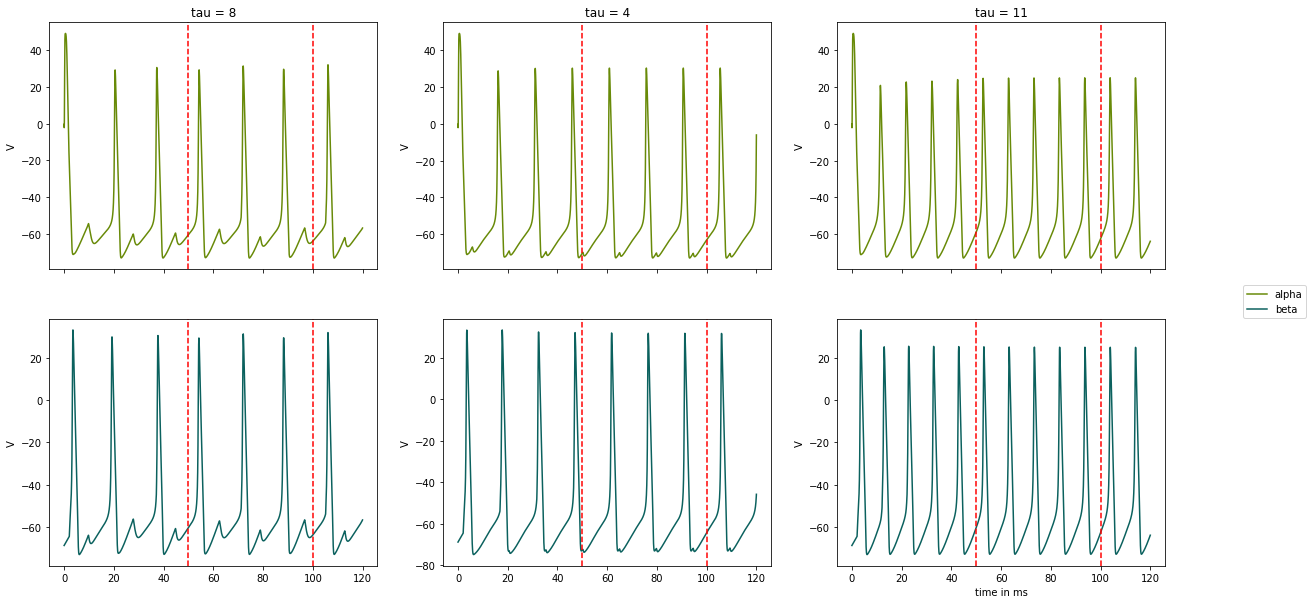

In [12]:
spikes_hh([hhn_scen1, hhn_scen2_1, hhn_scen2_2], [8,4, 11])

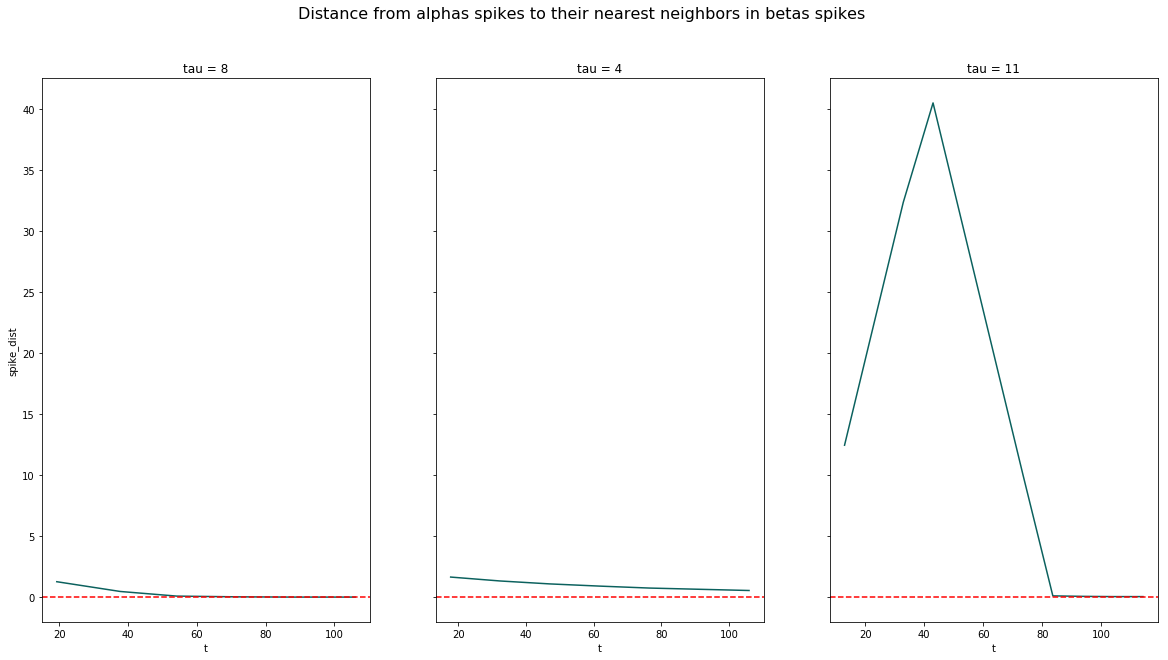

In [13]:
nearest_spike_neighbour([hhn_scen1,hhn_scen2_1, hhn_scen2_2], [8,4, 11])

The first plot shows the membrane potential of the two outer neurons ($\alpha, \beta$). Even though they start in different phases they synchronize quickly with zero time lag. This is emphasized in the second plot where we observe that the time difference between the spikes of the two outer neurons decreases to 0.

#### 2. Three HH cells in a circuit with reciprocal delayed synaptic connections with excitatory and inhibitory interconnections

According to the paper, robust zero lag synchrony among the outer neurons was also observed when the synaptic interaction between the cells was inhibitory instead of excitatory. However, we could not replicate this behaviour. If the connections are excitatory there are still small adjustments, but the neurons do not synchronize with zero delay.

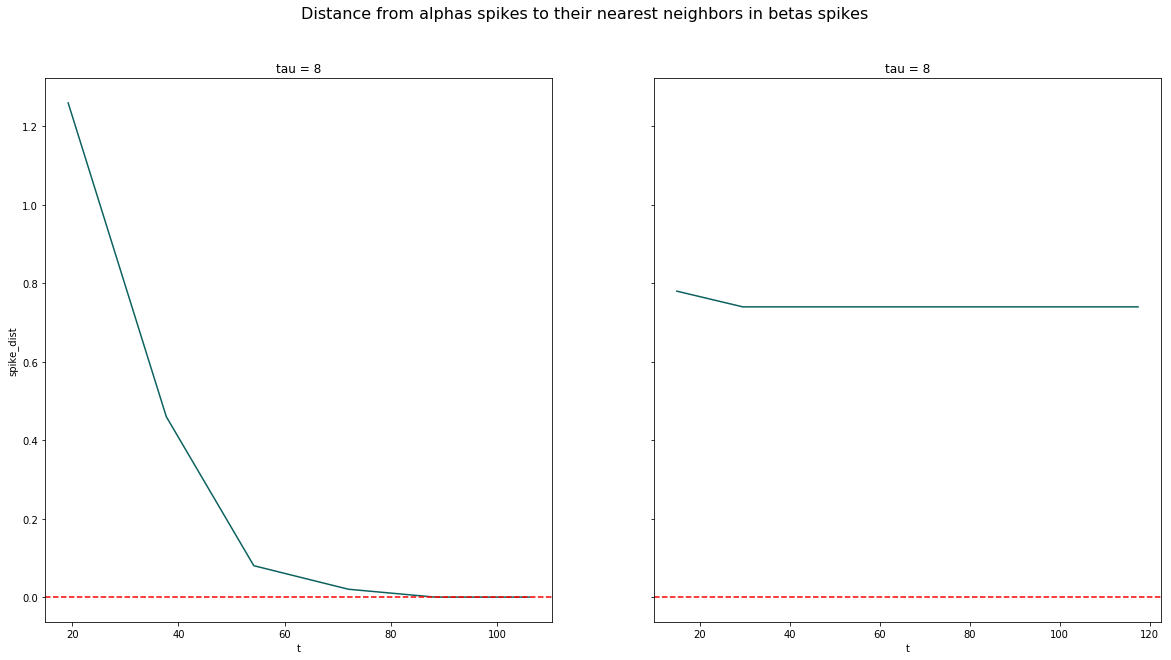

In [14]:
nearest_spike_neighbour([hhn_scen1,hhn_scen3], [8,8])

On the left side the synchronizing behaviour of the previous scenario is displayed. The right graph belongs to the circuit with excitatory connections. We see that the decrease stops at a lag of 0.7ms instead of zero. 

#### 3. Three HH cells in a circuit with reciprocal delayed synaptic connections where the inner neuron operates in a subtreshold regime

In order to emphasize the stability of the synchronization even if the inherent spiking behaviour differs among the neurons, in the third scenario gamma operates in a subthreshold regime without tonic firing such that it only spikes because of excitatory input from the other neurons.

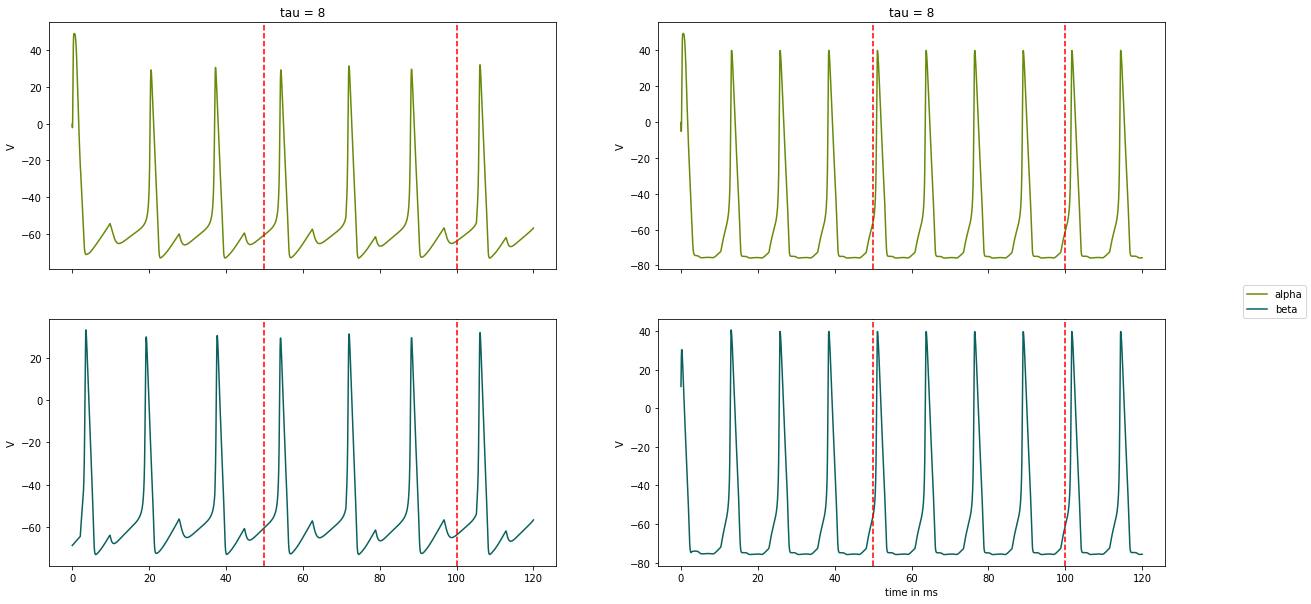

In [15]:
spikes_hh([hhn_scen1, hhn_scen4], [8,8])

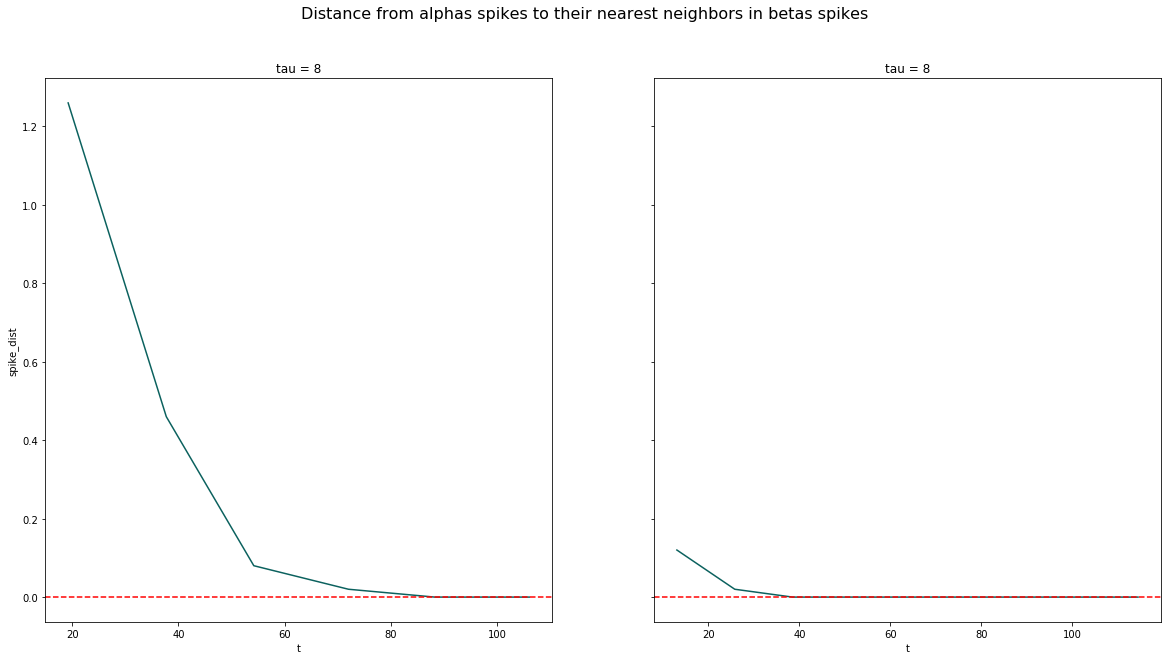

In [16]:
nearest_spike_neighbour([hhn_scen1,hhn_scen4], [8,8])

Again the synchronization is clearly visible even though the initial phase is randomly chosen and both scenarios start with strongly differing lag times. After 40 to 50ms in both scenarios a zero lag synchonization is reached no matter if gamma is opposed to tonic firing due to an external current or firing in a subthreshold regime.

#### 4. Three HH cells in a circuit with reciprocal delayed synaptic connections with delays displayed as a $\gamma$ distribution


The next scenario tries to approach natural neuronal connections by replacing constant delays with a $\gamma$ distribution. All delay values are sampled from a $\gamma$ distribution with means ranging from 3ms to 10ms and different shape factors and then averaged out.


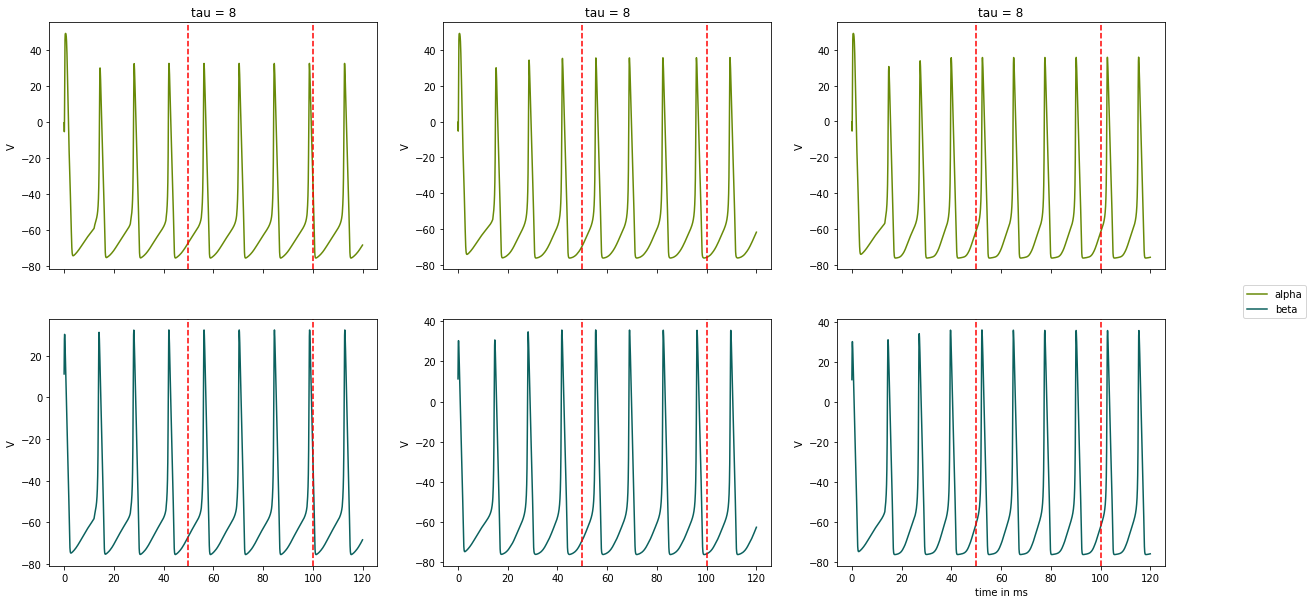

In [17]:
spikes_hh([hhn_scen5, hhn_scen6, hhn_scen7], [8,8,8])

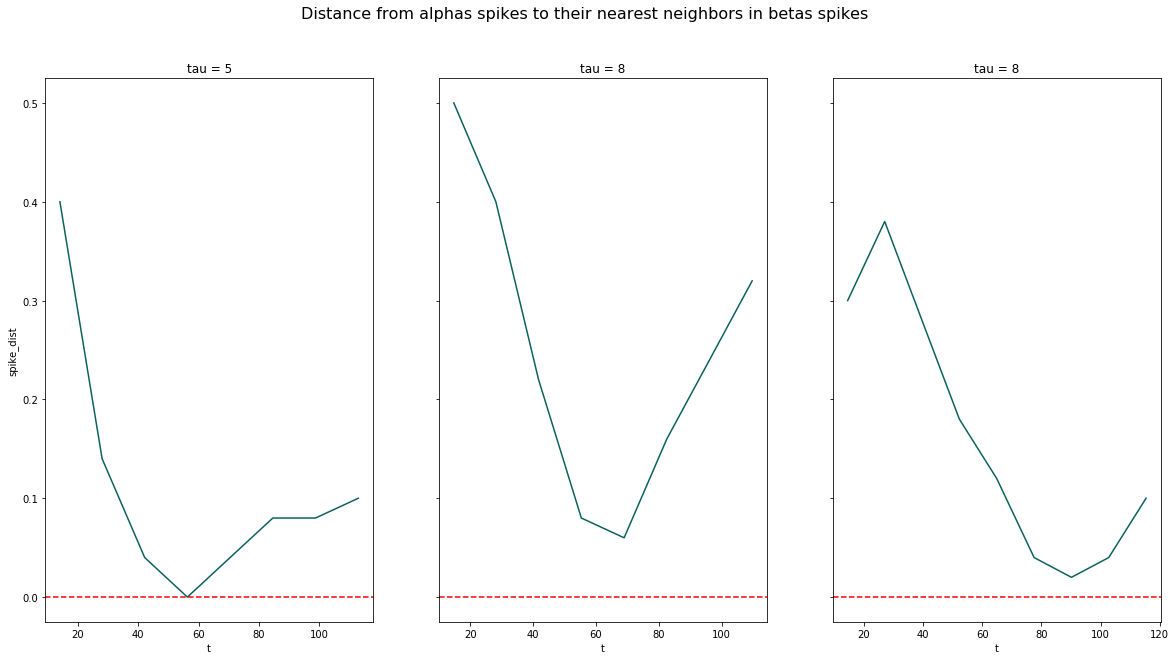

In [18]:
nearest_spike_neighbour([hhn_scen5,hhn_scen6, hhn_scen7], [5,8,8])

Unfortunately we were not able to confirm the observation that synchronization happens even if differnet axonal delays influence the connections. The time lag decreases but neither stabilizes nor reaches the expected zero lag synchronization. 

### Synchronization behaviour of Populations of Distant Neurons

To check whether zero time lag-correlated firing is induced among neurons in different populations, we built 3 large networks of sparsely connected excitatory and inhibitory integrate and fire (IAF) neurons.

Each population was composed of 4,175 IAF neurons from which
80% were excitatory and 20% inhibitory. Each neuron received a synapse from 10% of randomly selected cells inside its population and from 0.25% from the excitatory class of the neighboring populations.

We interconnected the 3 populations following the topology of the network motif under study, i.e., the mutual relaying of activities of 2 external populations onto an intermediate pool of relay neurons. Additionally, we checked two other cases: one, with no connections between the different populations at all and another one with direct connections between the outer populations.

#### 1. Three networks without long - range interpopulation connections 


![alt text](img/unconnected.png "Case 1")

In the first case all 3 networks are initialized without the long-range interpopulation connections. Only the recurrent local connections and the Poissonian external background were active and thus responsible for any dynamics in the stand-alone networks.
<br>
<br>
Consequently, each population initially exhibited spiking of their
neurons in an incoherent and unsynchronized fashion.



#### 2. Three networks with long - range interpopulation connections

![alt text](img/alpha-beta-gamma.png "Case 1")

In the second case the three populations are interconnected following the topology of the network motif under study, i.e., the mutual relaying of activities of 2 external populations onto an intermediate pool of relay neurons.

Once the long-range synapses were activated, we observed that the firing of the neurons organized toward the collective synchrony of the outer populations.

#### 3. Three networks long - range interpopulation connections between the outer populations

![alt text](img/alpha-beta.png "Case 1")

To determine the role of the relay cells in shaping the synchronization among cells belonging to the remote
neuronal networks we designed the following control experiment. We investigated the neuronal dynamics obtained under exactly the same conditions as in the former approach with the only variation that this time the 2 outer
networks interacted directly.

The sole change of the topology of the connections meant that networks 1 and 3, even if engaged in oscillations with similar characteristics as before, no longer synchronized their spikes at zero lag.

### Results

#### 1. Raster plot 

300 neurons are randomly selected among the 3 populations (neurons 1–100 are from population alpha, 101–200 from population beta, and 201–300 from population gamma). The top 20 neurons of each subpopulation (plotted in gray with lighter background) are inhibitory, and the rest are excitatory (black).

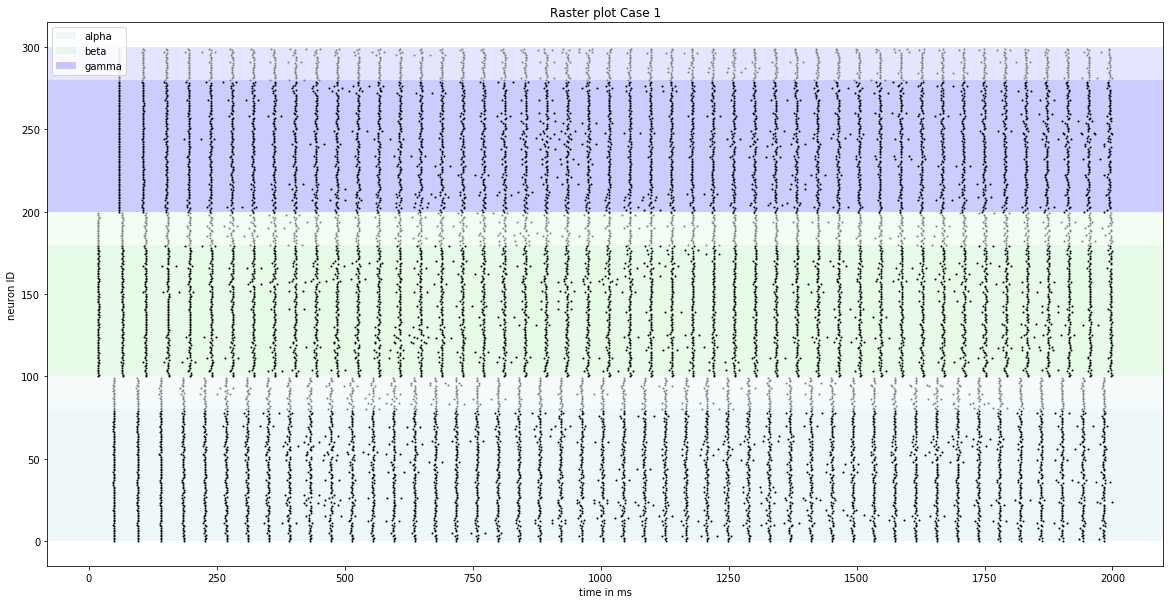

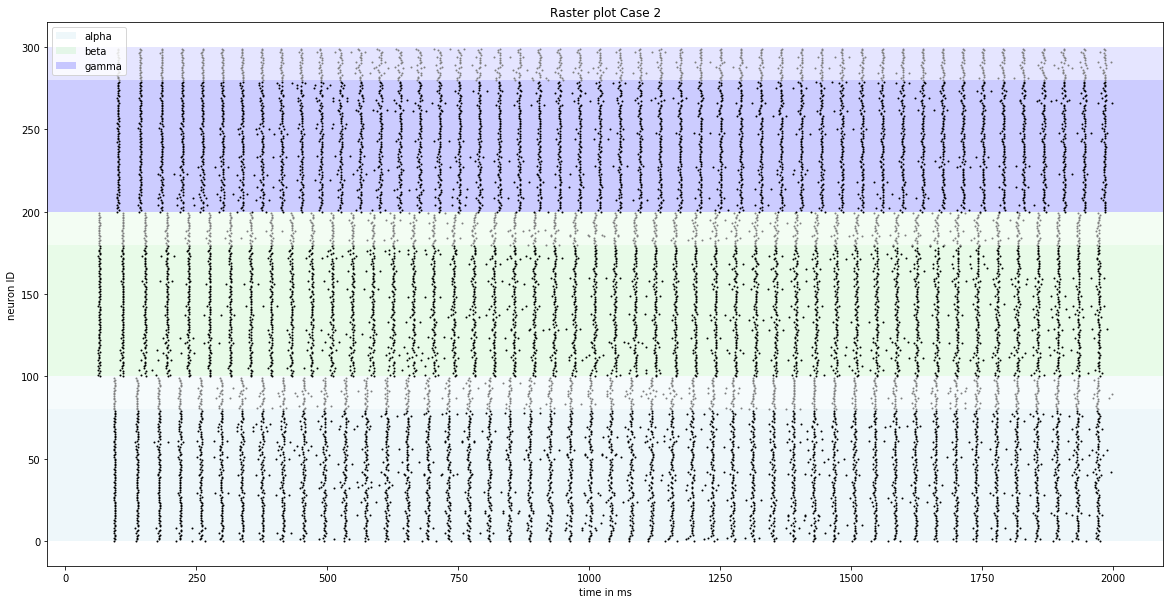

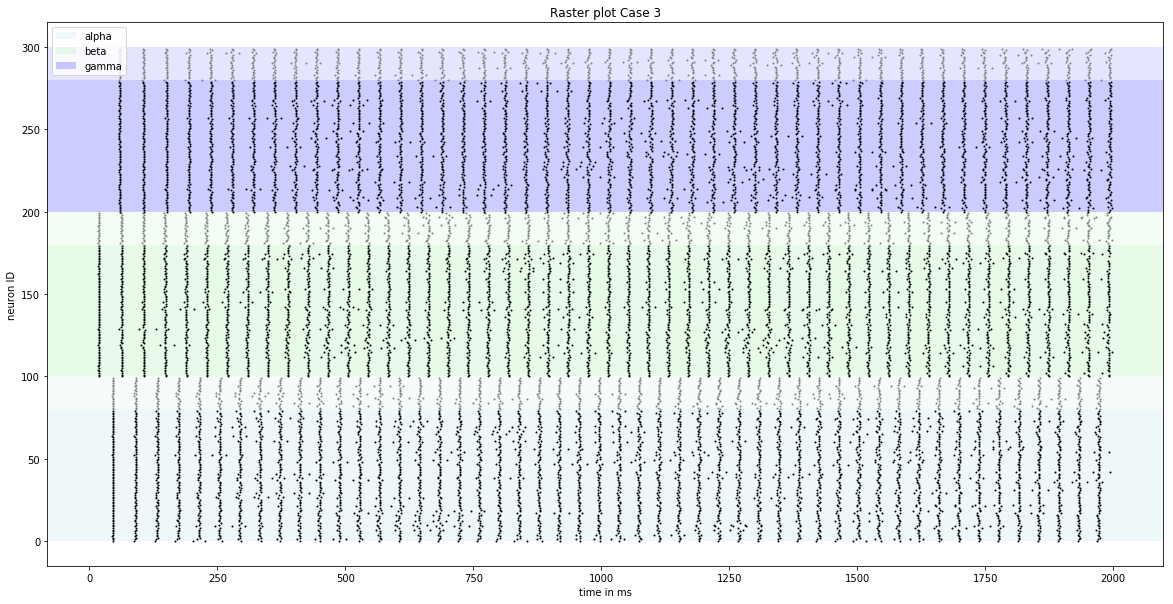

In [16]:
raster_plot(sd1, 1)
raster_plot(sd2, 2)
raster_plot(sd3, 3)

##### Interpretation
The plots support the hypothesis that two populations coupled both to a third one will synchronize after some time with almost 0 time lag. 

In the first plot, we can see that in case 1, where the populations are not connected to each other, the spiking behavior is not influenced. The phase length always stays the same and therefore also the time differences / time lag between the spiking of the neurons from the different populations compared to each other. Especially alpha and beta - the populations we are interested in - are not synronized.

In the second plot, we can see that the coupling to a third population in the middle leads to synchony: after ~850ms, the neurons from population alpha and beta fire with 0 time lag. This state is not only temporarily, but stays permanantly. It is especially interesting that gamma does not synchronize neither with alpha nor beta, but only affects their spiking behavior.

In the third plot, we can see that a direct coupling of alpha and beta is not enough to produce synchronous firing. This supports the hypothesis that we need a third population to which the outer populations need to be connected.

#### 2. Averaged cross-correlogram

We randomly selected three neurons (one from each of the three populations) and computed for each pair of neurons belonging to different populations the histogram of coincidences (bin size of 2 ms) as a function of the time shift of one of the spike trains. We computed the cross-correlograms within the time window ranging from 1500 to 1,900 ms to avoid the transients toward the synchronous state. The procedure was repeated 300 times to give rise to the estimated averaged distributions of coincidences.

In [ ]:
coinc_hists(vm1,1)
coinc_hists(vm2,2)
coinc_hists(vm3,3)

##### Interpretation
These plots show the coincidence of the firing of neurons from the different populations. A high bin therefore means that there are a lot of neurons that have exactly that time difference in spiking when compared to neurons form the other population.

The plots also support the hypothesis that two populations coupled both to a third one will synchronize after some time with almost 0 time lag. 

In the first plot, we can see that in case 1, where the populations are not connected to each other, that there is the typical shape, indicating that the phase length is the same for all populations. The time lag is not 0 and therefore the firing is not synchronous.

For the second case, we can see that the coupling to a third population in the middle leads to synchony: alpha and beta fire with ~0 time lag (the other high peaks are therefore the phase length, i.e. all neurons have a phase length of ~40ms and therefore there is a pattern repitition). Note that the synchrony is only between alpha and beta - compared to gamme neither alpha nor gamma have a 0 time lag in firing. This supports our hypothesis.

In the third plot, we can see that a direct coupling of alpha and beta is not enough to produce synchronous firing. This supports the hypothesis that we need a third population to which the outer populations need to be connected.

#### Firing histogram of each subpopulation of 100 randomly selected neurons

In [ ]:
firing_hists(sd1,1)
firing_hists(sd2,2)
firing_hists(sd3,3)

##### Interpretation
These plots show the firing (sum) of neurons from the different populations. A high PSTH therefore means that there are a lot of neurons that fire exactly  at that time. We plotted the first 1000ms, as this perfectly shows that at the beginning, all populations fire randomly and in case 2, alpha and beta will synchronize after some time. 

The plots also support the hypothesis that two populations coupled both to a third one will synchronize after some time with almost 0 time lag. 

In the first plot, we can see that in case 1, where the populations are not connected to each other, all populations fire randomly. Even after 1000ms, there is no synchrony.


For the second case, we can see that the coupling to a third population in the middle leads to synchony: alpha and beta fire with ~ 0 time lag at the end (~ 900ms after the connection). This can be seen because the PTSH of alpha and beta are about the same at the end, i.e. the neurons fire at the same times. Gamma is not synchronized with alpha and beta, but only influences this synchronization.

In the third plot, we can see that a direct coupling of alpha and beta is not enough to produce synchronous firing. Even after 1000ms, alpha and beta neurons do not fire at the same time. This supports the hypothesis that we need a third population to which the outer populations need to be connected.

In [ ]:
violin_plots([vm1,vm2,vm3])

##### Interpretation
This plot shows the time lag between the firing of one randomly selected neuron from each populations compared to each other, for all 3 cases. We only considered the data from 1500ms-2000ms to o avoid the transients toward the synchronous state.  We can clearly see that only in case 2, where we have an alpha-gamma and a beta-gamma connection, the neurons will fire with 0 time lag. 

### Summary

In all the experiments, we saw that populations have a fixed phase time and will fire in that cyclic rhythm. When the start is random, the normally do not synchronzie, unless the two other populations are connected to a third one in the middle. Only in this case, the two outer populations will synchronize after ~850ms. With a direct coupling of two populations, this cannot be achieved.

We tested these finding for different axonal delays (2-20ms) for the interpopulational connections and achieved the same results. Therefore, the hypothesis is also delay-robust and not just an artifact produced by a specific axonal delay. 

## Conclusion

We looked at 3 single HH neurons and found out that the connection of two of them to a third one will lead to synchronous firing (however we where not able to reproduce these findings for all settings). In all other cases, those two never produced synchrony. We were able to reproduce these finding in large populations of IAF neurons. This supports the initial hypothesis that dynamical relaying can yield zero time lag neuronal synchrony despite long conduction delays. We showed that 2 populations of cells can
become synchronized with zero phase lag if coupled reciprocally to a third population. Synchrony is maintained even when the fibers connecting the networks accumulate axonal delays of several tens of milliseconds.